Bu yöntemde daha başlangıçta belli sayıdaki küme için toplam ortalama hatayı minimize etmek amaçlanır.

In [22]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
df= pd.read_csv("newsgroups.csv")
df.info()

text_column="content"

#metin olmayan satırları silme
df=df.dropna(subset=[text_column])

texts=df["content"].astype(str)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       11314 non-null  object
 1   target        11314 non-null  int64 
 2   target_names  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 265.3+ KB


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [24]:
#metin ön işleme ve temizleme

def clean_text(text):
  text=text.lower()
  text=re.sub(r"http\S++|wwww.\S+", "", text) #url temizle
  text=re.sub(r"[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]", "", text) #noktalama ve sayılar
  text=re.sub("\s+", " ", text).strip()
  return text

# temizleme işlemi uygulanır
df["clean_text"]=texts.apply(clean_text)
print(df.head())

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2591917070.py:7: SyntaxWarning: invalid escape sequence '\s'
  text=re.sub("\s+", " ", text).strip()


                                             content  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   

            target_names                                         clean_text  
0              rec.autos  from lerxstwamumdedu wheres my thing subject w...  
1  comp.sys.mac.hardware  from guykuocarsonuwashingtonedu guy kuo subjec...  
2  comp.sys.mac.hardware  from twillisececnpurdueedu thomas e willis sub...  
3          comp.graphics  from jgreenamber joe green subject re weitek p...  
4              sci.space  from jcmheadcfaharvardedu jonathan mcdowell su...  


In [25]:
#TF-IDF Vektörleştirme
vectorizer=TfidfVectorizer(
    max_features=3000,
    stop_words="english",
    ngram_range=(1,2)

)
X= vectorizer.fit_transform(df["clean_text"])

In [26]:
#K-Means Kümeleme

k=20 #küme sayısı
kmeans=KMeans(n_clusters=k, random_state=42)
df["cluster"]=kmeans.fit_predict(X)

print(df[["clean_text", "cluster"]].head(20))

                                           clean_text  cluster
0   from lerxstwamumdedu wheres my thing subject w...        0
1   from guykuocarsonuwashingtonedu guy kuo subjec...        4
2   from twillisececnpurdueedu thomas e willis sub...        4
3   from jgreenamber joe green subject re weitek p...        5
4   from jcmheadcfaharvardedu jonathan mcdowell su...        0
5   from dfovttoulutkovttfi foxvog douglas subject...        2
6   from bmdelanequadsuchicagoedu brian manning de...        1
7   from bgrubbdantenmsuedu grubb subject re ide v...       14
8   from holmesiscsvaxuniedu subject win icon help...        1
9   from kerruxcsouiucedu stan kerr subject re sig...        4
10  from irwincmptrclonestarorg irwin arnstein sub...       13
11  from davidterminusericssonse david bold subjec...        9
12  from rodcfchpcom rod cerkoney subject gqxffekv...        5
13  from dbmtmlercnasagov david b mckissock subjec...       17
14  from jlleeacsubuffaloedu johnny l lee subject ...  

In [27]:
# 2D Görselleştirme PCA
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.toarray())

df["pca1"]=X_2d[:,0]
df["pca2"]=X_2d[:,1]

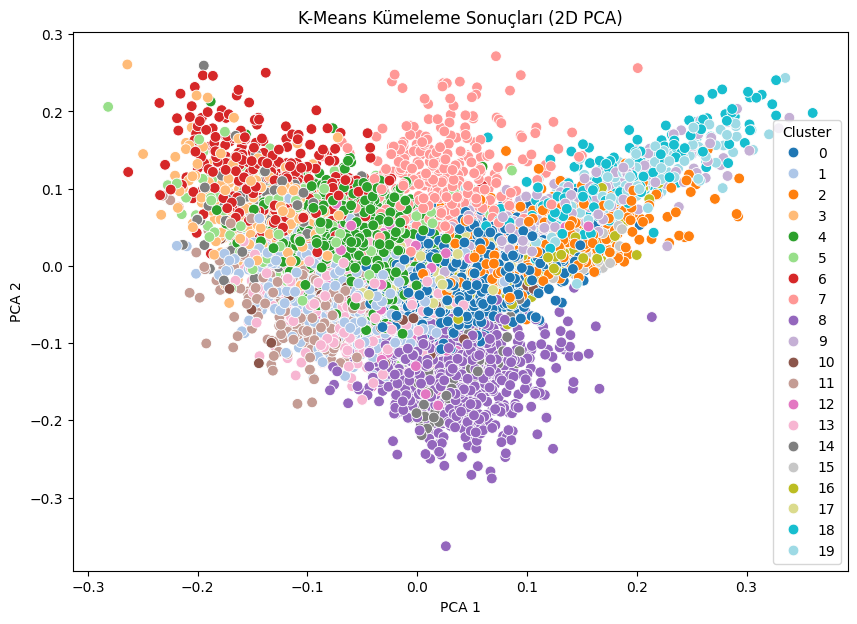

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="pca1", y="pca2",
    hue="cluster",
    palette="tab20",
    data=df,
    s=60
)
plt.title("K-Means Kümeleme Sonuçları (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()